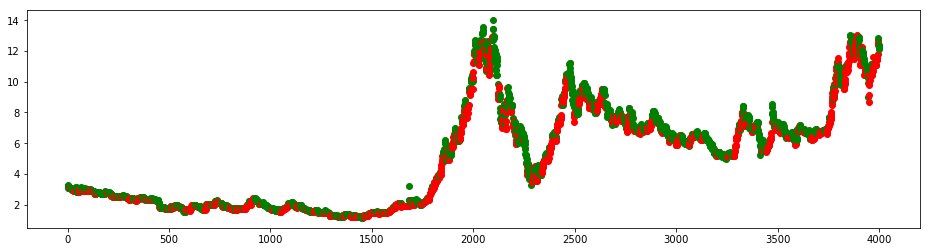

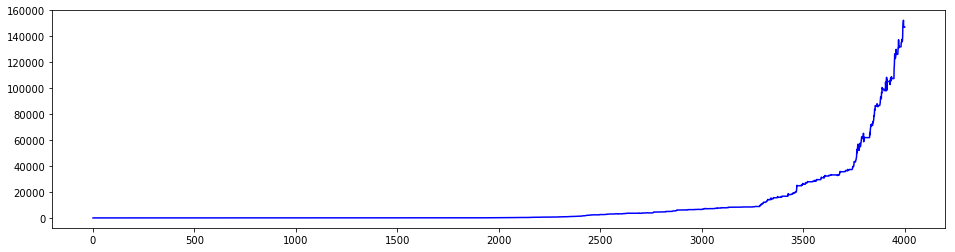

In [64]:
# Viterbi Algorithm(隐序列推测)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

import numpy as np

def Viterbi(O,LM,CM):
    LM = np.log(LM)
    CM = np.log(CM)
    pi=[[1,1]]
    for i in range (1,len(O)):
        pi.append([0,0])
        if O[i] == "R":
            pi[i][0] = LM[0][0]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][0]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
        else:
            pi[i][0] = LM[0][1]+max(pi[i-1][0]+CM[0][0],pi[i-1][1]+CM[1][0])
            pi[i][1] = LM[1][1]+max(pi[i-1][0]+CM[0][1],pi[i-1][1]+CM[1][1])
    
    if pi[len(O)-1][0] >= pi[len(O)-1][1]:
        H = "U";pr_H = "U"
    else:
        H = "D";pr_H = "D"
    
    for i in range (len(O)-2,-1,-1):
        if pr_H == "D":
            if pi[i][0]+CM[0][1] > pi[i][1]+CM[1][1]:
                pr_H="U"
            else:
                pr_H="D"
        if pr_H=="U":
            if pi[i][0]+CM[0][0] > pi[i][1]+CM[1][0]:
                pr_H="U"
            else:
                pr_H="D"
        H=pr_H+H
        
    return H

# Baum-Welch Algorithm(参数估计)
# O(Obvious-line):      the Obvious-line we got at last step 
# LM(Launch Matrix):    a 2*2 matrix to save launch probability
# CM(Change Matrix):    a 2*2 matrix to save change probability

def F(x):
    if x == 'U':
        return 0
    else:
        return 1
    
def f(x):
    if x == 'R':
        return 0
    else:
        return 1
        

def BW(O):
    CM = [[0.6, 0.4], [0.4, 0.6]]
    LM = [[0.6, 0.4], [0.4, 0.6]]
    C = [[0,0],[0,0]]
    L = [[0,0],[0,0]]
    n = 1
    while (C !=CM or L != LM):
        H = Viterbi(O,LM,CM)
        print("Step "),
        print(n)
        print("O-line: "),
        print(O)
        print("H-line: "),
        print(H)
        print("CM      "),
        print(CM)
        print("LM      "),
        print(LM)
        print("\n")
        
        n = n+1
        for i in range (2):
            C[i][0] = CM[i][0]
            C[i][1] = CM[i][1]
            L[i][0] = LM[i][0]
            L[i][1] = LM[i][1]
        for i in range(len(O)-1):
            LM[F(H[i])][f(O[i])]+=1
            CM[F(H[i])][F(H[i+1])]+=1
        LM[F(H[len(O)-1])][f(O[len(O)-1])]+=1
        for i in range (2):
            x=LM[i][0]+LM[i][1]
            LM[i][0] = round(LM[i][0]*1.0/x,5)
            LM[i][1] = round(LM[i][1]*1.0/x,5)
            x=CM[i][0]+CM[i][1]
            CM[i][0] = round(CM[i][0]*1.0/x,5)
            CM[i][1] = round(CM[i][1]*1.0/x,5)
    return LM,CM



import csv
Data = []
with open('600000.csv','rb') as ff:
    reader = csv.reader(ff)
    for row in reader:
        Data.append(row)
O = ""
Price = []
Rate0 = []
for i in range(len(Data)-2):
    if(Data[i+2][4]!="null" and Data[i+1][4]!="null"):
        Price.append(Data[i+1][4])
        Rate0.append(float(Data[i+2][4])/float(Data[i+1][4]))
        if (float(Data[i+2][4])-float(Data[i+1][4])>=0):
            O = O + "R"
        else:
            O = O + "G"
            
import matplotlib.pyplot as plt
#LM,CM = BW(O[0:50])
#CM = [[0.6, 0.4], [0.45, 0.55]]
#LM = [[0.9, 0.1], [0.1, 0.9]]
days = 4000
Hdline = Viterbi(O,[[0.6, 0.4], [0.4, 0.6]],[[0.6, 0.4], [0.4, 0.6]])
fig, ax = plt.subplots(figsize=(16, 4))
for i in range (len(O[0:days])):
    if Hdline[i] == "U":
        ax.plot([i],[Price[i]],'ro')
    elif Hdline[i] == "D":
        ax.plot([i],[Price[i]],'go')
plt.show()
#图像化显示计算出的涨跌区间

fig, ax = plt.subplots(figsize=(16, 4))
Price_my = [1]
flag = False
for i in range (1,len(O[0:days])+1):
    if flag == False:
        Price_my.append(Price_my[len(Price_my)-1]*1.0)
    else:
        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
    if Hdline[i-1] == "U" and  Hdline[i] == "D":
        flag = False
    elif Hdline[i-1] == "D" and Hdline[i] == "U":
        flag = True
ax.plot(Price_my,'b')
#Price_my = [1]
#for i in range (1,len(O[0:days])+1):
#    if O[i] == 'R':
#        Price_my.append(Price_my[len(Price_my)-1]*Rate0[i])
#    else:
#        Price_my.append(Price_my[len(Price_my)-1]*1.0)
#ax.plot(Price_my,'k')
plt.show()
#依照此涨跌去购买的收益曲线

In [82]:
t_num=0
f_num=0
for i in range(len(O)):
    if f(O[i]) == F(Hdline[i]):
        t_num=t_num+1
    else:
        f_num=f_num+1
float(t_num)/float(f_num+t_num)

0.7901990811638591